In [1]:
!pip install mordred -q
!pip install rdkit -q
!pip install numpy==1.24

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw,PandasTools,AllChem

import mordred
from mordred import Calculator,descriptors

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_columns',2000)
warnings.filterwarnings("ignore")


In [3]:
sns.set(style="whitegrid")

In [4]:
data=pd.read_csv("delaney.csv")
data.head()

Compound ID  measured log(solubility:mol/L)  \
0       1,1,1,2-Tetrachloroethane                           -2.18   
1           1,1,1-Trichloroethane                           -2.00   
2       1,1,2,2-Tetrachloroethane                           -1.74   
3           1,1,2-Trichloroethane                           -1.48   
4  1,1,2-Trichlorotrifluoroethane                           -3.04   

   ESOL predicted log(solubility:mol/L)               SMILES  
0                                -2.794       ClCC(Cl)(Cl)Cl  
1                                -2.232         CC(Cl)(Cl)Cl  
2                                -2.549       ClC(Cl)C(Cl)Cl  
3                                -1.961           ClCC(Cl)Cl  
4                                -3.077  FC(F)(Cl)C(F)(Cl)Cl

In [5]:
mol_list = []
for smile in data['SMILES']:
    mol = Chem.MolFromSmiles(smile)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    mol_list.append(mol)
    
data = pd.concat([data, pd.DataFrame(mol_list, columns = (['Mol']))], axis=1)

In [6]:
data.head()

Compound ID  measured log(solubility:mol/L)  \
0       1,1,1,2-Tetrachloroethane                           -2.18   
1           1,1,1-Trichloroethane                           -2.00   
2       1,1,2,2-Tetrachloroethane                           -1.74   
3           1,1,2-Trichloroethane                           -1.48   
4  1,1,2-Trichlorotrifluoroethane                           -3.04   

   ESOL predicted log(solubility:mol/L)               SMILES  \
0                                -2.794       ClCC(Cl)(Cl)Cl   
1                                -2.232         CC(Cl)(Cl)Cl   
2                                -2.549       ClC(Cl)C(Cl)Cl   
3                                -1.961           ClCC(Cl)Cl   
4                                -3.077  FC(F)(Cl)C(F)(Cl)Cl   

                                                Mol  
0  <rdkit.Chem.rdchem.Mol object at 0x7f858c61b450>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f858c61aa40>  
2  <rdkit.Chem.rdchem.Mol object at 0x7f858c61b300>  
3  <rdkit.Chem.rdchem.Mol object at 0x7f858c61b3e0>  
4  <rdkit.Chem.rdchem.Mol object at 0x7f858c61b4c0>

In [7]:
mol = data["Mol"][51]

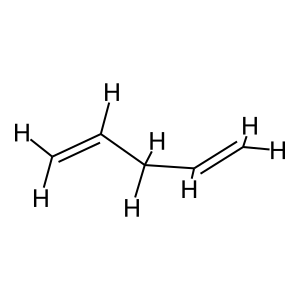

In [8]:
img = Draw.MolToImage(mol)
img

In [9]:
# Creating a descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D = False)
all_desc=calc.pandas(data['Mol'])

100%|███████████████████████████████████████| 1144/1144 [01:04<00:00, 17.77it/s]


In [10]:
all_desc.head()

ABC  \
0  module 'numpy' has no attribute 'float' (ABC)   
1  module 'numpy' has no attribute 'float' (ABC)   
2  module 'numpy' has no attribute 'float' (ABC)   
3  module 'numpy' has no attribute 'float' (ABC)   
4  module 'numpy' has no attribute 'float' (ABC)   

                                               ABCGG  nAcid  nBase   SpAbs_A  \
0  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.818626   
1  module 'numpy' has no attribute 'float' (ABCGG...      0      0  4.000000   
2  module 'numpy' has no attribute 'float' (ABCGG...      0      0  6.000000   
3  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.226252   
4  module 'numpy' has no attribute 'float' (ABCGG...      0      0  7.211103   

    SpMax_A  SpDiam_A    SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A  \
0  2.074313  4.148627  5.818626  0.969771  2.626363  2.285500  0.380917   
1  2.000000  4.000000  4.000000  0.800000  2.444466  2.121320  0.424264   
2  2.000000  4.000000  6.000000  1.000000  2.610845  2.309401  0.384900   
3  1.847759  3.695518  5.226252  1.045250  2.408576  2.130986  0.426197   
4  2.302776  4.605551  7.211103  0.901388  2.947233  2.602595  0.325324   

      VE3_A      VR1_A     VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  \
0  0.315759  11.637367  1.939561  1.943396          0          0      8   
1  0.058892   8.000000  1.600000  1.386294          0          0      8   
2  0.326163  11.530010  1.921668  1.934128          0          0      8   
3  0.063438   8.629874  1.725975  1.462083          0          0      8   
4  0.733365  17.881697  2.235212  2.660634          0          0      8   

   nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  \
0           6       0            0        4   2   0   2   0   0   0   0   0   
1           5       0            0        3   3   0   2   0   0   0   0   0   
2           6       0            0        4   2   0   2   0   0   0   0   0   
3           5       0            0        3   3   0   2   0   0   0   0   0   
4           8       0            0        6   0   0   2   0   0   0   0   3   

   nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  \
0    4    0   0   4   22.419753   18.888889    9.592593    1.814815     0.0   
1    3    0   0   3   18.814815   13.333333    4.148148    0.000000     0.0   
2    4    0   0   4   20.419753   18.333333   10.543210    2.419753     0.0   
3    3    0   0   3   14.814815   12.222222    6.049383    1.209877     0.0   
4    3    0   0   6  180.814815  109.333333  164.716049  126.432099     0.0   

   ATS5dv  ATS6dv  ATS7dv  ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  \
0     0.0     0.0     0.0     0.0   26.0   26.0   24.0    9.0    0.0    0.0   
1     0.0     0.0     0.0     0.0   23.0   19.0   21.0    9.0    0.0    0.0   
2     0.0     0.0     0.0     0.0   24.0   27.0   24.0    9.0    0.0    0.0   
3     0.0     0.0     0.0     0.0   19.0   21.0   21.0    9.0    0.0    0.0   
4     0.0     0.0     0.0     0.0   38.0   40.0   30.0    9.0    0.0    0.0   

   ATS6d  ATS7d  ATS8d       ATS0s      ATS1s       ATS2s       ATS3s ATS4s  \
0    0.0    0.0    0.0   13.055908  11.939815   19.361568    13.50663   0.0   
1    0.0    0.0    0.0   13.995056  13.546296    20.25663   12.111111   0.0   
2    0.0    0.0    0.0   12.798964  11.621399   18.848041   13.626124   0.0   
3    0.0    0.0    0.0   12.460334  11.940329    18.19151   12.350099   0.0   
4    0.0    0.0    0.0  200.557556  36.608796  143.918877  185.448865   0.0   

  ATS5s ATS6s ATS7s ATS8s   ATS0Z  ATS1Z   ATS2Z   ATS3Z  ATS4Z  ATS5Z  ATS6Z  \
0   0.0   0.0   0.0   0.0  1230.0  456.0  1322.0   969.0    0.0    0.0    0.0   
1   0.0   0.0   0.0   0.0   942.0  360.0  1194.0   153.0    0.0    0.0    0.0   
2   0.0   0.0   0.0   0.0  1230.0  456.0  1066.0  1225.0    0.0    0.0    0.0   
3   0.0   0.0   0.0   0.0   942.0  360.0   682.0   665.0    0.0    0.0    0.0   
4   0.0   0.0   0.0   0.0  1182.0  504.0  14

In [11]:
all_desc.shape

(1144, 1826)

In [12]:
df_index=data[['Compound ID','SMILES','measured log(solubility:mol/L)']]

In [13]:
df = pd.concat([df_index,all_desc],axis=1)
df.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)  \
0                           -2.18   
1                           -2.00   
2                           -1.74   
3                           -1.48   
4                           -3.04   

                                             ABC  \
0  module 'numpy' has no attribute 'float' (ABC)   
1  module 'numpy' has no attribute 'float' (ABC)   
2  module 'numpy' has no attribute 'float' (ABC)   
3  module 'numpy' has no attribute 'float' (ABC)   
4  module 'numpy' has no attribute 'float' (ABC)   

                                               ABCGG  nAcid  nBase   SpAbs_A  \
0  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.818626   
1  module 'numpy' has no attribute 'float' (ABCGG...      0      0  4.000000   
2  module 'numpy' has no attribute 'float' (ABCGG...      0      0  6.000000   
3  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.226252   
4  module 'numpy' has no attribute 'float' (ABCGG...      0      0  7.211103   

    SpMax_A  SpDiam_A    SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A  \
0  2.074313  4.148627  5.818626  0.969771  2.626363  2.285500  0.380917   
1  2.000000  4.000000  4.000000  0.800000  2.444466  2.121320  0.424264   
2  2.000000  4.000000  6.000000  1.000000  2.610845  2.309401  0.384900   
3  1.847759  3.695518  5.226252  1.045250  2.408576  2.130986  0.426197   
4  2.302776  4.605551  7.211103  0.901388  2.947233  2.602595  0.325324   

      VE3_A      VR1_A     VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  \
0  0.315759  11.637367  1.939561  1.943396          0          0      8   
1  0.058892   8.000000  1.600000  1.386294          0          0      8   
2  0.326163  11.530010  1.921668  1.934128          0          0      8   
3  0.063438   8.629874  1.725975  1.462083          0          0      8   
4  0.733365  17.881697  2.235212  2.660634          0          0      8   

   nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  \
0           6       0            0        4   2   0   2   0   0   0   0   0   
1           5       0            0        3   3   0   2   0   0   0   0   0   
2           6       0            0        4   2   0   2   0   0   0   0   0   
3           5       0            0        3   3   0   2   0   0   0   0   0   
4           8       0            0        6   0   0   2   0   0   0   0   3   

   nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  \
0    4    0   0   4   22.419753   18.888889    9.592593    1.814815     0.0   
1    3    0   0   3   18.814815   13.333333    4.148148    0.000000     0.0   
2    4    0   0   4   20.419753   18.333333   10.543210    2.419753     0.0   
3    3    0   0   3   14.814815   12.222222    6.049383    1.209877     0.0   
4    3    0   0   6  180.814815  109.333333  164.716049  126.432099     0.0   

   ATS5dv  ATS6dv  ATS7dv  ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  \
0     0.0     0.0     0.0     0.0   26.0   26.0   24.0    9.0    0.0    0.0   
1     0.0     0.0     0.0     0.0   23.0   19.0   21.0    9.0    0.0    0.0   
2     0.0     0.0     0.0     0.0   24.0   27.0   24.0    9.0    0.0    0.0   
3     0.0     0.0     0.0     0.0   19.0   21.0   21.0    9.0    0.0    0.0   
4     0.0     0.0     0.0     0.0   38.0   40.0   30.0    9.0    0.0    0.0   

   ATS6d  ATS7d  ATS8d       ATS0s      ATS1s       ATS2s       ATS3s ATS4s  \
0    0.0    0.0    0.0   13.055908  11.939815   19.361568    13.50663   0.0   
1    0.0    0.0    0.0   13.995056  13.546296    20.25663   12.111111   0.0   
2    0.0    0.0    0.0   12.798964  11.621399   18.848041   13.626124   0.0   
3    0.0    0

In [14]:
df.to_excel('delaney_mordred.xlsx', index= None)

### Loading the Dataset 

In [15]:
df=pd.read_excel('delaney_mordred.xlsx')

### Data Preprocessing

In [16]:
df.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)  \
0                           -2.18   
1                           -2.00   
2                           -1.74   
3                           -1.48   
4                           -3.04   

                                             ABC  \
0  module 'numpy' has no attribute 'float' (ABC)   
1  module 'numpy' has no attribute 'float' (ABC)   
2  module 'numpy' has no attribute 'float' (ABC)   
3  module 'numpy' has no attribute 'float' (ABC)   
4  module 'numpy' has no attribute 'float' (ABC)   

                                               ABCGG  nAcid  nBase   SpAbs_A  \
0  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.818626   
1  module 'numpy' has no attribute 'float' (ABCGG...      0      0  4.000000   
2  module 'numpy' has no attribute 'float' (ABCGG...      0      0  6.000000   
3  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.226252   
4  module 'numpy' has no attribute 'float' (ABCGG...      0      0  7.211103   

    SpMax_A  SpDiam_A    SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A  \
0  2.074313  4.148627  5.818626  0.969771  2.626363  2.285500  0.380917   
1  2.000000  4.000000  4.000000  0.800000  2.444466  2.121320  0.424264   
2  2.000000  4.000000  6.000000  1.000000  2.610845  2.309401  0.384900   
3  1.847759  3.695518  5.226252  1.045250  2.408576  2.130986  0.426197   
4  2.302776  4.605551  7.211103  0.901388  2.947233  2.602595  0.325324   

      VE3_A      VR1_A     VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  \
0  0.315759  11.637367  1.939561  1.943396          0          0      8   
1  0.058892   8.000000  1.600000  1.386294          0          0      8   
2  0.326163  11.530010  1.921668  1.934128          0          0      8   
3  0.063438   8.629874  1.725975  1.462083          0          0      8   
4  0.733365  17.881697  2.235212  2.660634          0          0      8   

   nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  \
0           6       0            0        4   2   0   2   0   0   0   0   0   
1           5       0            0        3   3   0   2   0   0   0   0   0   
2           6       0            0        4   2   0   2   0   0   0   0   0   
3           5       0            0        3   3   0   2   0   0   0   0   0   
4           8       0            0        6   0   0   2   0   0   0   0   3   

   nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  \
0    4    0   0   4   22.419753   18.888889    9.592593    1.814815     0.0   
1    3    0   0   3   18.814815   13.333333    4.148148    0.000000     0.0   
2    4    0   0   4   20.419753   18.333333   10.543210    2.419753     0.0   
3    3    0   0   3   14.814815   12.222222    6.049383    1.209877     0.0   
4    3    0   0   6  180.814815  109.333333  164.716049  126.432099     0.0   

   ATS5dv  ATS6dv  ATS7dv  ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  \
0     0.0     0.0     0.0     0.0     26     26     24      9      0      0   
1     0.0     0.0     0.0     0.0     23     19     21      9      0      0   
2     0.0     0.0     0.0     0.0     24     27     24      9      0      0   
3     0.0     0.0     0.0     0.0     19     21     21      9      0      0   
4     0.0     0.0     0.0     0.0     38     40     30      9      0      0   

   ATS6d  ATS7d  ATS8d       ATS0s      ATS1s       ATS2s       ATS3s ATS4s  \
0      0      0      0   13.055908  11.939815   19.361568    13.50663     0   
1      0      0      0   13.995056  13.546296    20.25663   12.111111     0   
2      0      0      0   12.798964  11.621399   18.848041   13.626124     0   
3      0     

In [17]:
data = df.iloc[:,3:]

In [18]:
data.head()

ABC  \
0  module 'numpy' has no attribute 'float' (ABC)   
1  module 'numpy' has no attribute 'float' (ABC)   
2  module 'numpy' has no attribute 'float' (ABC)   
3  module 'numpy' has no attribute 'float' (ABC)   
4  module 'numpy' has no attribute 'float' (ABC)   

                                               ABCGG  nAcid  nBase   SpAbs_A  \
0  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.818626   
1  module 'numpy' has no attribute 'float' (ABCGG...      0      0  4.000000   
2  module 'numpy' has no attribute 'float' (ABCGG...      0      0  6.000000   
3  module 'numpy' has no attribute 'float' (ABCGG...      0      0  5.226252   
4  module 'numpy' has no attribute 'float' (ABCGG...      0      0  7.211103   

    SpMax_A  SpDiam_A    SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A  \
0  2.074313  4.148627  5.818626  0.969771  2.626363  2.285500  0.380917   
1  2.000000  4.000000  4.000000  0.800000  2.444466  2.121320  0.424264   
2  2.000000  4.000000  6.000000  1.000000  2.610845  2.309401  0.384900   
3  1.847759  3.695518  5.226252  1.045250  2.408576  2.130986  0.426197   
4  2.302776  4.605551  7.211103  0.901388  2.947233  2.602595  0.325324   

      VE3_A      VR1_A     VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  \
0  0.315759  11.637367  1.939561  1.943396          0          0      8   
1  0.058892   8.000000  1.600000  1.386294          0          0      8   
2  0.326163  11.530010  1.921668  1.934128          0          0      8   
3  0.063438   8.629874  1.725975  1.462083          0          0      8   
4  0.733365  17.881697  2.235212  2.660634          0          0      8   

   nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  \
0           6       0            0        4   2   0   2   0   0   0   0   0   
1           5       0            0        3   3   0   2   0   0   0   0   0   
2           6       0            0        4   2   0   2   0   0   0   0   0   
3           5       0            0        3   3   0   2   0   0   0   0   0   
4           8       0            0        6   0   0   2   0   0   0   0   3   

   nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv      ATS3dv  ATS4dv  \
0    4    0   0   4   22.419753   18.888889    9.592593    1.814815     0.0   
1    3    0   0   3   18.814815   13.333333    4.148148    0.000000     0.0   
2    4    0   0   4   20.419753   18.333333   10.543210    2.419753     0.0   
3    3    0   0   3   14.814815   12.222222    6.049383    1.209877     0.0   
4    3    0   0   6  180.814815  109.333333  164.716049  126.432099     0.0   

   ATS5dv  ATS6dv  ATS7dv  ATS8dv  ATS0d  ATS1d  ATS2d  ATS3d  ATS4d  ATS5d  \
0     0.0     0.0     0.0     0.0     26     26     24      9      0      0   
1     0.0     0.0     0.0     0.0     23     19     21      9      0      0   
2     0.0     0.0     0.0     0.0     24     27     24      9      0      0   
3     0.0     0.0     0.0     0.0     19     21     21      9      0      0   
4     0.0     0.0     0.0     0.0     38     40     30      9      0      0   

   ATS6d  ATS7d  ATS8d       ATS0s      ATS1s       ATS2s       ATS3s ATS4s  \
0      0      0      0   13.055908  11.939815   19.361568    13.50663     0   
1      0      0      0   13.995056  13.546296    20.25663   12.111111     0   
2      0      0      0   12.798964  11.621399   18.848041   13.626124     0   
3      0      0      0   12.460334  11.940329    18.19151   12.350099     0   
4      0      0      0  200.557556  36.608796  143.918877  185.448865     0   

  ATS5s ATS6s ATS7s ATS8s  ATS0Z  ATS1Z  ATS2Z  ATS3Z  ATS4Z  ATS5Z  ATS6Z  \
0     0     0     0     0   1230    456   1322    969      0      0      0   
1     0     0     0     0    942    360   1194    153      0      0      0   
2     0     0     0     0   1230    456   1066   1225      0      0      0   
3     0     0     0     0    942    360    682    665      0      0      0   
4     0     0     0     0   1182    504   1450   1505      

In [19]:
data.isnull().sum().sum()

0

In [20]:
col_num=[]
col_bool=[]

for col in data.columns:
    col_type= data[col].dtype
    if col_type== 'object':
        pass
    elif col_type== 'bool':
        col_bool.append(col)
    else:
        col_num.append(col)

In [21]:
len(col_num)

1109

In [22]:
col_bool

['Lipinski', 'GhoseFilter']

In [23]:
data['Lipinski'].unique()

array([ True, False])

<Axes: xlabel='Lipinski'>

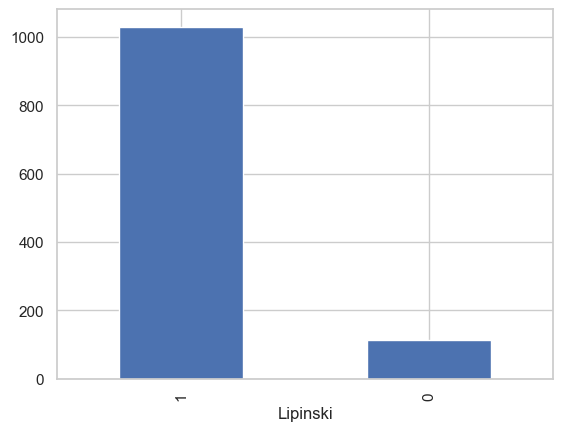

In [24]:
gf = data['Lipinski'].astype(int)
gf.value_counts().plot(kind='bar')

In [25]:
data = data[col_num + col_bool]

In [26]:
data.shape

(1144, 1111)

In [27]:
def remove_constant_values(data):
    return [e for e in data.columns if data[e].nunique() == 1]

drop_col = remove_constant_values(data)
#drop_col

new_df_columns = [e for e in data.columns if e not in drop_col]
new_df = data[new_df_columns]
new_df

nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A   SpMAD_A   LogEE_A  \
0         0   5.818626  2.074313  4.148627   5.818626  0.969771  2.626363   
1         0   4.000000  2.000000  4.000000   4.000000  0.800000  2.444466   
2         0   6.000000  2.000000  4.000000   6.000000  1.000000  2.610845   
3         0   5.226252  1.847759  3.695518   5.226252  1.045250  2.408576   
4         0   7.211103  2.302776  4.605551   7.211103  0.901388  2.947233   
...     ...        ...       ...       ...        ...       ...       ...   
1139      0  19.178732  2.222674  4.445348  19.178732  1.198671  3.613477   
1140      0  21.491177  2.513161  4.873236  21.491177  1.193954  3.821470   
1141      0  29.447228  2.482065  4.964130  29.447228  1.280314  4.064996   
1142      0  27.142711  2.437677  4.875353  27.142711  1.180118  4.049881   
1143      0  15.211804  2.278414  4.556827  15.211804  1.170139  3.450538   

         VE1_A     VE2_A     VE3_A       VR1_A     VR2_A  nAromAtom  \
0     2.285500  0.380917  0.315759   11.637367  1.939561          0   
1     2.121320  0.424264  0.058892    8.000000  1.600000          0   
2     2.309401  0.384900  0.326163   11.530010  1.921668          0   
3     2.130986  0.426197  0.063438    8.629874  1.725975          0   
4     2.602595  0.325324  0.733365   17.881697  2.235212          0   
...        ...       ...       ...         ...       ...        ...   
1139  3.333258  0.208329  1.673954   92.824702  5.801544          0   
1140  3.668785  0.203821  1.887647  105.790793  5.877266          6   
1141  4.121171  0.179181  2.249046  175.486940  7.629867         16   
1142  4.179173  0.181703  2.263023  152.094429  6.612801         12   
1143  3.265105  0.251162  1.445656   57.381559  4.413966          6   

      nAromBond  nAtom  nHeavyAtom  nSpiro  nBridgehead  nHetero  nH  nC  nN  \
0             0      8           6       0            0        4   2   2   0   
1             0      8           5       0            0        3   3   2   0   
2             0      8           6       0            0        4   2   2   0   
3             0      8           5       0            0        3   3   2   0   
4             0      8           8       0            0        6   0   2   0   
...         ...    ...         ...     ...          ...      ...  ..  ..  ..   
1139          0     34          16       0            0        8  18   8   1   
1140          6     27          18       0            0        6   9  12   1   
1141         17     39          23       0            0        4  16  19   0   
1142         12     38          23       0            0        8  15  15   2   
1143          6     26          13       0            0        3  13  10   1   

      nO  nS  nP  nF  nCl  nBr  nI  nX      ATS0dv      ATS1dv      ATS2dv  \
0      0   0   0   0    4    0   0   4   22.419753   18.888889    9.592593   
1      0   0   0   0    3    0   0   3   18.814815   13.333333    4.148148   
2      0   0   0   0    4    0   0   4   20.419753   18.333333   10.543210   
3      0   0   0   0    3    0   0   3   14.814815   12.222222    6.049383   
4      0   0   0   3    3    0   0   6  180.814815  109.333333  164.716049   
...   ..  ..  ..  ..  ...  ...  ..  ..         ...         ...         ...   
1139   4   2   1   0    0    0   0   0  198.197531   90.037037  196.222222   
1140   3   0   0   0    2    0   0   2  271.209877  272.222222  423.333333   
1141   4   0   0   0    0    0   0   0  340.000000  333.000000  474.000000   
1142   4   1   0   0    1    0   0   1  334.049383  269.777778  484.111111   
1143   2   0   0   0    0    0   0   0  182.000000  172.000000  227.000000   

          ATS3dv      ATS4dv      ATS5dv      ATS6dv      ATS7dv      ATS8dv  \
0       1.814815    0.000000    0.000000    0.000000    0.000000    0.000000   
1       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2       2.419753    0.000000    0.000000    0.000000    0.000000    0.000000   
3       1.

In [28]:
len(drop_col)

153

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(new_df, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

new_df.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  726


In [31]:
new_df.shape

(1144, 232)

In [32]:
new_df.head()

nBase   SpAbs_A   SpMax_A   SpMAD_A      VR1_A  nAromAtom  nSpiro  \
0      0  5.818626  2.074313  0.969771  11.637367          0       0   
1      0  4.000000  2.000000  0.800000   8.000000          0       0   
2      0  6.000000  2.000000  1.000000  11.530010          0       0   
3      0  5.226252  1.847759  1.045250   8.629874          0       0   
4      0  7.211103  2.302776  0.901388  17.881697          0       0   

   nBridgehead  nHetero  nN  nO  nS  nP  nF  nCl  nBr  nI  ATS0Z    AATS0dv  \
0            0        4   0   0   0   0   0    4    0   0   1230   2.802469   
1            0        3   0   0   0   0   0    3    0   0    942   2.351852   
2            0        4   0   0   0   0   0    4    0   0   1230   2.552469   
3            0        3   0   0   0   0   0    3    0   0    942   1.851852   
4            0        6   0   0   0   0   3    3    0   0   1182  22.601852   

   AATS0Z    AATS0se      AATS0i    ATSC2c  ATSC4c  ATSC5c  ATSC6c  ATSC7c  \
0  153.75   9.602557  162.007716 -0.011568     0.0     0.0     0.0     0.0   
1  117.75   8.932912  164.102494  0.043231     0.0     0.0     0.0     0.0   
2  153.75   9.602557  162.007716 -0.044361     0.0     0.0     0.0     0.0   
3  117.75   8.932912  164.102494 -0.023423     0.0     0.0     0.0     0.0   
4  147.75  12.413488  208.591109 -0.181777     0.0     0.0     0.0     0.0   

   ATSC8c   ATSC1dv    ATSC2dv   ATSC3dv  ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  \
0     0.0 -2.908179  -5.972222  2.858796      0.0      0.0      0.0      0.0   
1     0.0 -1.256944  -5.935185  1.145833      0.0      0.0      0.0      0.0   
2     0.0 -3.463735  -5.021605  3.463735      0.0      0.0      0.0      0.0   
3     0.0 -2.368056  -4.033951  2.355710      0.0      0.0      0.0      0.0   
4     0.0 -0.006944 -19.367284 -9.672068      0.0      0.0      0.0      0.0   

   ATSC8dv  ATSC2d    ATSC3d  ATSC4d  ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  \
0      0.0 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   
1      0.0 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625   
2      0.0 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   
3      0.0 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625   
4      0.0 -6.7500  5.062500     0.0     0.0     0.0     0.0     0.0 -27.5625   

   ATSC2Z    ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v  \
0   61.25 -237.9375     0.0     0.0     0.0     0.0     0.0  -7.930847   
1  377.25 -570.9375     0.0     0.0     0.0     0.0     0.0 -24.259843   
2 -194.75   18.0625     0.0     0.0     0.0     0.0     0.0  -7.930847   
3 -134.75  -58.9375     0.0     0.0     0.0     0.0     0.0 -24.259843   
4  -68.75   11.5625     0.0     0.0     0.0     0.0     0.0  -4.106652   

       ATSC2v      ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  ATSC8v   ATSC1se  \
0   84.336362 -276.801627     0.0     0.0     0.0     0.0     0.0 -0.106276   
1  394.752254 -616.388225     0.0     0.0     0.0     0.0     0.0 -0.046494   
2 -200.396113    7.930847     0.0     0.0     0.0     0.0     0.0 -0.106276   
3 -174.712695  -46.923275     0.0     0.0     0.0     0.0     0.0 -0.046494   
4  -47.277414  -16.794288     0.0     0.0     0.0     0.0     0.0 -0.552978   

    ATSC3se  ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se    ATSC1p    ATSC1i  \
0 -0.673413      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421   
1 -1.707806      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448   
2  0.106276      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421   
3 -0.148428      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448   
4  0.484072      0.0      0.0      0.0      0.0      0.0 -0.051133 -8.709500   

      ATSC2i    ATSC3i  ATSC5i  ATSC6i  ATSC7i  ATSC8i   AATSC1d    AATSC2Z  \
0  -2.625254  1.670496     0.0     0.0     0.0     0.0 -0.464286   5.104167   
1  -2.471710  1.406117     0.0     0.0     0.0     0.0 -0.502232  31.437500   
2  -3.023179  2.0684

In [33]:
new_df['Lipinski'] = df["Lipinski"].astype(int)
new_df['GhoseFilter'] = df["GhoseFilter"].astype(int)

In [34]:
new_df.head()

nBase   SpAbs_A   SpMax_A   SpMAD_A      VR1_A  nAromAtom  nSpiro  \
0      0  5.818626  2.074313  0.969771  11.637367          0       0   
1      0  4.000000  2.000000  0.800000   8.000000          0       0   
2      0  6.000000  2.000000  1.000000  11.530010          0       0   
3      0  5.226252  1.847759  1.045250   8.629874          0       0   
4      0  7.211103  2.302776  0.901388  17.881697          0       0   

   nBridgehead  nHetero  nN  nO  nS  nP  nF  nCl  nBr  nI  ATS0Z    AATS0dv  \
0            0        4   0   0   0   0   0    4    0   0   1230   2.802469   
1            0        3   0   0   0   0   0    3    0   0    942   2.351852   
2            0        4   0   0   0   0   0    4    0   0   1230   2.552469   
3            0        3   0   0   0   0   0    3    0   0    942   1.851852   
4            0        6   0   0   0   0   3    3    0   0   1182  22.601852   

   AATS0Z    AATS0se      AATS0i    ATSC2c  ATSC4c  ATSC5c  ATSC6c  ATSC7c  \
0  153.75   9.602557  162.007716 -0.011568     0.0     0.0     0.0     0.0   
1  117.75   8.932912  164.102494  0.043231     0.0     0.0     0.0     0.0   
2  153.75   9.602557  162.007716 -0.044361     0.0     0.0     0.0     0.0   
3  117.75   8.932912  164.102494 -0.023423     0.0     0.0     0.0     0.0   
4  147.75  12.413488  208.591109 -0.181777     0.0     0.0     0.0     0.0   

   ATSC8c   ATSC1dv    ATSC2dv   ATSC3dv  ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  \
0     0.0 -2.908179  -5.972222  2.858796      0.0      0.0      0.0      0.0   
1     0.0 -1.256944  -5.935185  1.145833      0.0      0.0      0.0      0.0   
2     0.0 -3.463735  -5.021605  3.463735      0.0      0.0      0.0      0.0   
3     0.0 -2.368056  -4.033951  2.355710      0.0      0.0      0.0      0.0   
4     0.0 -0.006944 -19.367284 -9.672068      0.0      0.0      0.0      0.0   

   ATSC8dv  ATSC2d    ATSC3d  ATSC4d  ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  \
0      0.0 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   
1      0.0 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625   
2      0.0 -3.0000  2.250000     0.0     0.0     0.0     0.0     0.0 -18.0625   
3      0.0 -1.6875  1.265625     0.0     0.0     0.0     0.0     0.0  -5.0625   
4      0.0 -6.7500  5.062500     0.0     0.0     0.0     0.0     0.0 -27.5625   

   ATSC2Z    ATSC3Z  ATSC4Z  ATSC5Z  ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v  \
0   61.25 -237.9375     0.0     0.0     0.0     0.0     0.0  -7.930847   
1  377.25 -570.9375     0.0     0.0     0.0     0.0     0.0 -24.259843   
2 -194.75   18.0625     0.0     0.0     0.0     0.0     0.0  -7.930847   
3 -134.75  -58.9375     0.0     0.0     0.0     0.0     0.0 -24.259843   
4  -68.75   11.5625     0.0     0.0     0.0     0.0     0.0  -4.106652   

       ATSC2v      ATSC3v  ATSC4v  ATSC5v  ATSC6v  ATSC7v  ATSC8v   ATSC1se  \
0   84.336362 -276.801627     0.0     0.0     0.0     0.0     0.0 -0.106276   
1  394.752254 -616.388225     0.0     0.0     0.0     0.0     0.0 -0.046494   
2 -200.396113    7.930847     0.0     0.0     0.0     0.0     0.0 -0.106276   
3 -174.712695  -46.923275     0.0     0.0     0.0     0.0     0.0 -0.046494   
4  -47.277414  -16.794288     0.0     0.0     0.0     0.0     0.0 -0.552978   

    ATSC3se  ATSC4se  ATSC5se  ATSC6se  ATSC7se  ATSC8se    ATSC1p    ATSC1i  \
0 -0.673413      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421   
1 -1.707806      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448   
2  0.106276      0.0      0.0      0.0      0.0      0.0 -0.000018 -2.068421   
3 -0.148428      0.0      0.0      0.0      0.0      0.0 -0.034207 -2.301448   
4  0.484072      0.0      0.0      0.0      0.0      0.0 -0.051133 -8.709500   

      ATSC2i    ATSC3i  ATSC5i  ATSC6i  ATSC7i  ATSC8i   AATSC1d    AATSC2Z  \
0  -2.625254  1.670496     0.0     0.0     0.0     0.0 -0.464286   5.104167   
1  -2.471710  1.406117     0.0     0.0     0.0     0.0 -0.502232  31.437500   
2  -3.023179  2.0684

In [35]:
df_final = pd.concat([df.iloc[:, :3], new_df], axis=1)
df_final.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)  nBase   SpAbs_A   SpMax_A   SpMAD_A  \
0                           -2.18      0  5.818626  2.074313  0.969771   
1                           -2.00      0  4.000000  2.000000  0.800000   
2                           -1.74      0  6.000000  2.000000  1.000000   
3                           -1.48      0  5.226252  1.847759  1.045250   
4                           -3.04      0  7.211103  2.302776  0.901388   

       VR1_A  nAromAtom  nSpiro  nBridgehead  nHetero  nN  nO  nS  nP  nF  \
0  11.637367          0       0            0        4   0   0   0   0   0   
1   8.000000          0       0            0        3   0   0   0   0   0   
2  11.530010          0       0            0        4   0   0   0   0   0   
3   8.629874          0       0            0        3   0   0   0   0   0   
4  17.881697          0       0            0        6   0   0   0   0   3   

   nCl  nBr  nI  ATS0Z    AATS0dv  AATS0Z    AATS0se      AATS0i    ATSC2c  \
0    4    0   0   1230   2.802469  153.75   9.602557  162.007716 -0.011568   
1    3    0   0    942   2.351852  117.75   8.932912  164.102494  0.043231   
2    4    0   0   1230   2.552469  153.75   9.602557  162.007716 -0.044361   
3    3    0   0    942   1.851852  117.75   8.932912  164.102494 -0.023423   
4    3    0   0   1182  22.601852  147.75  12.413488  208.591109 -0.181777   

   ATSC4c  ATSC5c  ATSC6c  ATSC7c  ATSC8c   ATSC1dv    ATSC2dv   ATSC3dv  \
0     0.0     0.0     0.0     0.0     0.0 -2.908179  -5.972222  2.858796   
1     0.0     0.0     0.0     0.0     0.0 -1.256944  -5.935185  1.145833   
2     0.0     0.0     0.0     0.0     0.0 -3.463735  -5.021605  3.463735   
3     0.0     0.0     0.0     0.0     0.0 -2.368056  -4.033951  2.355710   
4     0.0     0.0     0.0     0.0     0.0 -0.006944 -19.367284 -9.672068   

   ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  ATSC8dv  ATSC2d    ATSC3d  ATSC4d  \
0      0.0      0.0      0.0      0.0      0.0 -3.0000  2.250000     0.0   
1      0.0      0.0      0.0      0.0      0.0 -1.6875  1.265625     0.0   
2      0.0      0.0      0.0      0.0      0.0 -3.0000  2.250000     0.0   
3      0.0      0.0      0.0      0.0      0.0 -1.6875  1.265625     0.0   
4      0.0      0.0      0.0      0.0      0.0 -6.7500  5.062500     0.0   

   ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  ATSC2Z    ATSC3Z  ATSC4Z  ATSC5Z  \
0     0.0     0.0     0.0     0.0 -18.0625   61.25 -237.9375     0.0     0.0   
1     0.0     0.0     0.0     0.0  -5.0625  377.25 -570.9375     0.0     0.0   
2     0.0     0.0     0.0     0.0 -18.0625 -194.75   18.0625     0.0     0.0   
3     0.0     0.0     0.0     0.0  -5.0625 -134.75  -58.9375     0.0     0.0   
4     0.0     0.0     0.0     0.0 -27.5625  -68.75   11.5625     0.0     0.0   

   ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v      ATSC2v      ATSC3v  ATSC4v  ATSC5v  \
0     0.0     0.0     0.0  -7.930847   84.336362 -276.801627     0.0     0.0   
1     0.0     0.0     0.0 -24.259843  394.752254 -616.388225     0.0     0.0   
2     0.0     0.0     0.0  -7.930847 -200.396113    7.930847     0.0     0.0   
3     0.0     0.0     0.0 -24.259843 -174.712695  -46.923275     0.0     0.0   
4     0.0     0.0     0.0  -4.106652  -47.277414  -16.794288     0.0     0.0   

   ATSC6v  ATSC7v  ATSC8v   ATSC1se   ATSC3se  ATSC4se  ATSC5se  ATSC6se  \
0     0.0     0.0     0.0 -0.106276 -0.673413      0.0      0.0      0.0   
1     0.0     0.0     0.0 -0.046494 -1.707806      0.0      0.0      0.0   
2     0.0     0.0     0.0 -0.106276  0.106276      0.0      0.0      0.0   
3     0.0     0.0     0.0 -0.046494 -0.148428      0.0      0.0      0.0   
4     0.0     0.0     0.0 -0.552978  0.4

In [36]:
df_final.shape

(1144, 235)

In [37]:
df_final.to_csv('delaney_mordred_truncated.csv', index=None)

### data Analysis

In [38]:
df_final['measured log(solubility:mol/L)'].describe()

count    1144.000000
mean       -3.057997
std         2.096502
min       -11.600000
25%        -4.332250
50%        -2.870500
75%        -1.600000
max         1.580000
Name: measured log(solubility:mol/L), dtype: float64

(array([  1.,   4.,  33.,  48.,  99., 210., 288., 269., 137.,  55.]),
 array([-11.6  , -10.282,  -8.964,  -7.646,  -6.328,  -5.01 ,  -3.692,
         -2.374,  -1.056,   0.262,   1.58 ]),
 <BarContainer object of 10 artists>)

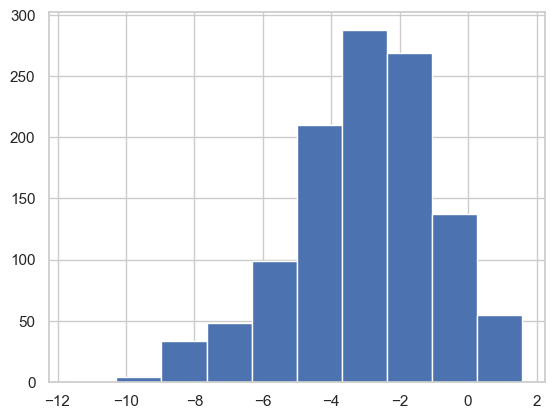

In [39]:
plt.hist(df_final['measured log(solubility:mol/L)'])

In [40]:
df_final.replace(['N/A', 'Unknown'], np.nan, inplace=True)

In [41]:
df_final_numeric = df_final.select_dtypes(include=['number'])
corr = df_final_numeric.corr()
corr

measured log(solubility:mol/L)     nBase  \
measured log(solubility:mol/L)                        1.000000  0.009436   
nBase                                                 0.009436  1.000000   
SpAbs_A                                              -0.593810  0.020937   
SpMax_A                                              -0.496695  0.016507   
SpMAD_A                                              -0.400888 -0.022689   
...                                                        ...       ...   
JGI8                                                 -0.381077  0.010402   
JGI9                                                 -0.296588  0.018965   
JGI10                                                -0.284985 -0.002792   
Lipinski                                              0.536947  0.025631   
GhoseFilter                                          -0.319041  0.039911   

                                 SpAbs_A   SpMax_A   SpMAD_A     VR1_A  \
measured log(solubility:mol/L) -0.593810 -0.496695 -0.400888 -0.042746   
nBase                           0.020937  0.016507 -0.022689 -0.003478   
SpAbs_A                         1.000000  0.770136  0.558693  0.263960   
SpMax_A                         0.770136  1.000000  0.656708  0.075138   
SpMAD_A                         0.558693  0.656708  1.000000  0.034976   
...                                  ...       ...       ...       ...   
JGI8                            0.645382  0.442467  0.284155  0.063713   
JGI9                            0.600489  0.354522  0.210123  0.073997   
JGI10                           0.569740  0.301021  0.173100  0.094727   
Lipinski                       -0.413444 -0.247034 -0.200843 -0.136917   
GhoseFilter                     0.579323  0.502609  0.307161 -0.029163   

                                nAromAtom    nSpiro  nBridgehead   nHetero  \
measured log(solubility:mol/L)  -0.489810  0.009736    -0.095359 -0.179433   
nBase                            0.011546 -0.006465    -0.008918  0.053709   
SpAbs_A                          0.508883  0.040954     0.083144  0.590964   
SpMax_A                          0.492683  0.085298     0.224172  0.516022   
SpMAD_A                          0.614815  0.023255     0.063530  0.072628   
...                                   ...       ...          ...       ...   
JGI8                             0.276180  0.016945    -0.035987  0.423663   
JGI9                             0.189807  0.008003    -0.050169  0.353518   
JGI10                            0.142253 -0.012563    -0.037981  0.300058   
Lipinski                        -0.317888  0.027918    -0.102014 -0.193421   
GhoseFilter                      0.277967  0.057683     0.020765  0.410917   

                                      nN        nO        nS        nP  \
measured log(solubility:mol/L)  0.066841  0.059156 -0.061972 -0.081202   
nBase                           0.150348 -0.009906  0.037553 -0.014915   
SpAbs_A                         0.246528  0.585815  0.095211  0.105543   
SpMax_A                         0.282651  0.388528  0.055910  0.061580   
SpMAD_A                         0.132353  0.102470 -0.057751 -0.041554   
...                                  ...       ...       ...       ...   
JGI8                            0.152328  0.395114  0.122871  0.108066   
JGI9                            0.071457  0.414981  0.093717  0.092732   
JGI10                           0.040651  0.398091  0.083977  0.086245   
Lipinski                        0.174111 -0.095816  0.016757 -0.064858   
GhoseFilter                     0.364935  0.322723  0.220497  0.187706   

                                      nF       nCl       nBr        nI  \
measured log(solubility:mol/L) -0.127937 -0.399321 -0.035298 -0.017184   
nBase                          -0.014002 -0.019362 -0.014413 -0.008798   
SpAbs_A                         0.177455  0.092166 -0.116597 -0.093795   
SpMax_A                         0.127419  0.209454 -0.108505 -0.124166   
SpMAD_A                        -0.

In [42]:
corr_sorted = abs(corr[['measured log(solubility:mol/L)']]).sort_values(by ='measured log(solubility:mol/L)', ascending=False)
corr_sorted = corr_sorted.iloc[1:5, :]
corr_sorted.rename(columns={'measured log(solubility:mol/L)' : 'correlation_coef'}, inplace=True)
corr_sorted

correlation_coef
FilterItLogS          0.863686
PEOE_VSA6             0.705928
RNCG                  0.627965
SpAbs_A               0.593810

Text(0, 0.5, 'Correlation Coefficient')

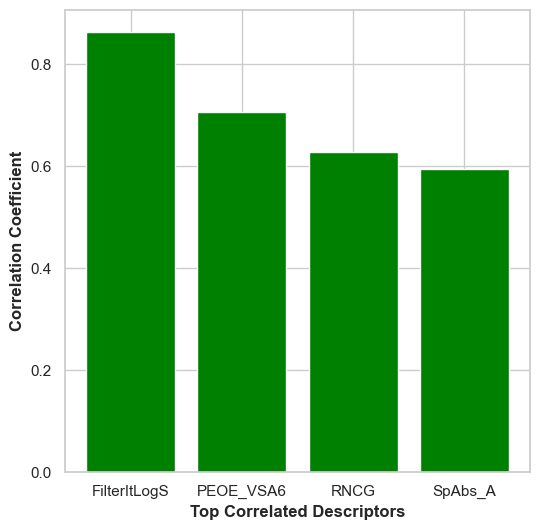

In [43]:
fig = plt.figure(1, figsize=(6,6))
ax1 = fig.add_subplot(111)
plt.bar(x = corr_sorted.index, height = corr_sorted['correlation_coef'], color = 'green')
ax1.set_xlabel('Top Correlated Descriptors', weight='bold')
ax1.set_ylabel('Correlation Coefficient', weight='bold')

Text(0, 0.5, 'RNCG')

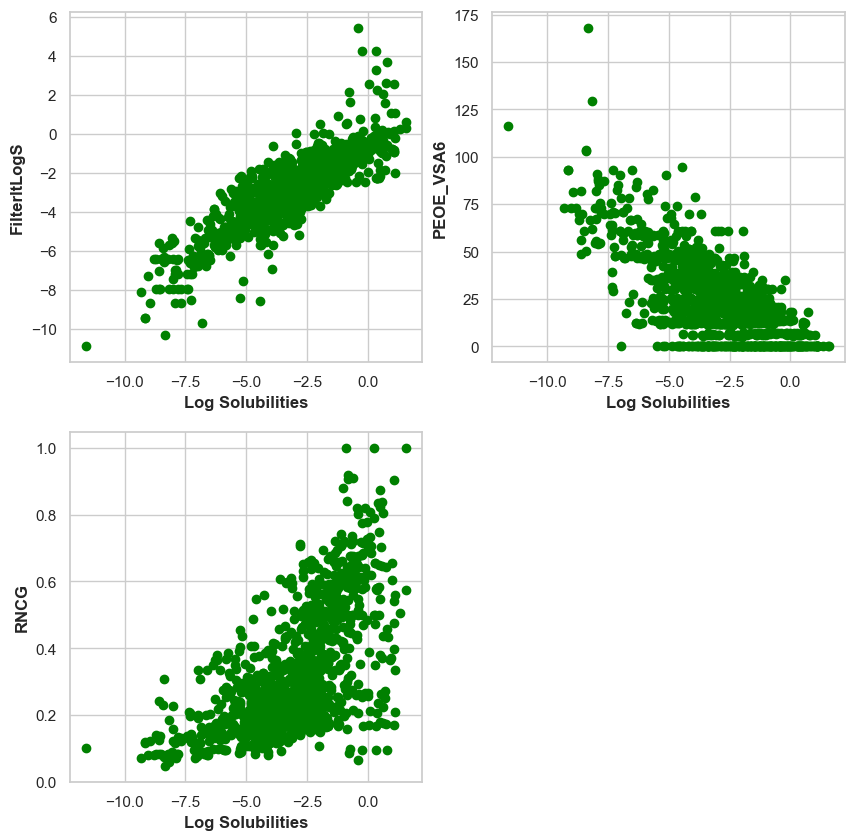

In [44]:
fig = plt.figure(4, figsize=(10,10))
ax = fig.add_subplot(221)
plt.scatter(x = df_final['measured log(solubility:mol/L)'], y = df_final['FilterItLogS'], color = 'green')
ax.set_xlabel('Log Solubilities', weight='bold')
ax.set_ylabel('FilterItLogS', weight='bold')

ax = fig.add_subplot(222)
plt.scatter(x = df_final['measured log(solubility:mol/L)'], y = df_final['PEOE_VSA6'], color = 'green')
ax.set_xlabel('Log Solubilities', weight='bold')
ax.set_ylabel('PEOE_VSA6', weight='bold')

ax = fig.add_subplot(223)
plt.scatter(x = df_final['measured log(solubility:mol/L)'], y = df_final['RNCG'], color = 'green')
ax.set_xlabel('Log Solubilities', weight='bold')
ax.set_ylabel('RNCG', weight='bold')



In [45]:
df_final = pd.read_csv('delaney_mordred_truncated.csv')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [47]:
df_final = pd.read_csv('delaney_mordred_truncated.csv')

In [48]:
df_final.head()

Compound ID               SMILES  \
0       1,1,1,2-Tetrachloroethane       ClCC(Cl)(Cl)Cl   
1           1,1,1-Trichloroethane         CC(Cl)(Cl)Cl   
2       1,1,2,2-Tetrachloroethane       ClC(Cl)C(Cl)Cl   
3           1,1,2-Trichloroethane           ClCC(Cl)Cl   
4  1,1,2-Trichlorotrifluoroethane  FC(F)(Cl)C(F)(Cl)Cl   

   measured log(solubility:mol/L)  nBase   SpAbs_A   SpMax_A   SpMAD_A  \
0                           -2.18      0  5.818626  2.074313  0.969771   
1                           -2.00      0  4.000000  2.000000  0.800000   
2                           -1.74      0  6.000000  2.000000  1.000000   
3                           -1.48      0  5.226252  1.847759  1.045250   
4                           -3.04      0  7.211103  2.302776  0.901388   

       VR1_A  nAromAtom  nSpiro  nBridgehead  nHetero  nN  nO  nS  nP  nF  \
0  11.637367          0       0            0        4   0   0   0   0   0   
1   8.000000          0       0            0        3   0   0   0   0   0   
2  11.530010          0       0            0        4   0   0   0   0   0   
3   8.629874          0       0            0        3   0   0   0   0   0   
4  17.881697          0       0            0        6   0   0   0   0   3   

   nCl  nBr  nI  ATS0Z    AATS0dv  AATS0Z    AATS0se      AATS0i    ATSC2c  \
0    4    0   0   1230   2.802469  153.75   9.602557  162.007716 -0.011568   
1    3    0   0    942   2.351852  117.75   8.932912  164.102494  0.043231   
2    4    0   0   1230   2.552469  153.75   9.602557  162.007716 -0.044361   
3    3    0   0    942   1.851852  117.75   8.932912  164.102494 -0.023423   
4    3    0   0   1182  22.601852  147.75  12.413488  208.591109 -0.181777   

   ATSC4c  ATSC5c  ATSC6c  ATSC7c  ATSC8c   ATSC1dv    ATSC2dv   ATSC3dv  \
0     0.0     0.0     0.0     0.0     0.0 -2.908179  -5.972222  2.858796   
1     0.0     0.0     0.0     0.0     0.0 -1.256944  -5.935185  1.145833   
2     0.0     0.0     0.0     0.0     0.0 -3.463735  -5.021605  3.463735   
3     0.0     0.0     0.0     0.0     0.0 -2.368056  -4.033951  2.355710   
4     0.0     0.0     0.0     0.0     0.0 -0.006944 -19.367284 -9.672068   

   ATSC4dv  ATSC5dv  ATSC6dv  ATSC7dv  ATSC8dv  ATSC2d    ATSC3d  ATSC4d  \
0      0.0      0.0      0.0      0.0      0.0 -3.0000  2.250000     0.0   
1      0.0      0.0      0.0      0.0      0.0 -1.6875  1.265625     0.0   
2      0.0      0.0      0.0      0.0      0.0 -3.0000  2.250000     0.0   
3      0.0      0.0      0.0      0.0      0.0 -1.6875  1.265625     0.0   
4      0.0      0.0      0.0      0.0      0.0 -6.7500  5.062500     0.0   

   ATSC5d  ATSC6d  ATSC7d  ATSC8d   ATSC1Z  ATSC2Z    ATSC3Z  ATSC4Z  ATSC5Z  \
0     0.0     0.0     0.0     0.0 -18.0625   61.25 -237.9375     0.0     0.0   
1     0.0     0.0     0.0     0.0  -5.0625  377.25 -570.9375     0.0     0.0   
2     0.0     0.0     0.0     0.0 -18.0625 -194.75   18.0625     0.0     0.0   
3     0.0     0.0     0.0     0.0  -5.0625 -134.75  -58.9375     0.0     0.0   
4     0.0     0.0     0.0     0.0 -27.5625  -68.75   11.5625     0.0     0.0   

   ATSC6Z  ATSC7Z  ATSC8Z     ATSC1v      ATSC2v      ATSC3v  ATSC4v  ATSC5v  \
0     0.0     0.0     0.0  -7.930847   84.336362 -276.801627     0.0     0.0   
1     0.0     0.0     0.0 -24.259843  394.752254 -616.388225     0.0     0.0   
2     0.0     0.0     0.0  -7.930847 -200.396113    7.930847     0.0     0.0   
3     0.0     0.0     0.0 -24.259843 -174.712695  -46.923275     0.0     0.0   
4     0.0     0.0     0.0  -4.106652  -47.277414  -16.794288     0.0     0.0   

   ATSC6v  ATSC7v  ATSC8v   ATSC1se   ATSC3se  ATSC4se  ATSC5se  ATSC6se  \
0     0.0     0.0     0.0 -0.106276 -0.673413      0.0      0.0      0.0   
1     0.0     0.0     0.0 -0.046494 -1.707806      0.0      0.0      0.0   
2     0.0     0.0     0.0 -0.106276  0.106276      0.0      0.0      0.0   
3     0.0     0.0     0.0 -0.046494 -0.148428      0.0      0.0      0.0   
4     0.0     0.0     0.0 -0.552978  0.4

In [49]:
df_final.shape

(1144, 235)

In [50]:
y = df_final['measured log(solubility:mol/L)']

In [51]:
scaled_DF = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:,3:]), columns=([df_final.iloc[:,3:]]))
scaled_DF

nBase   SpAbs_A   SpMax_A   SpMAD_A     VR1_A nAromAtom    nSpiro  \
0    -0.077041 -1.175105 -0.580433 -2.070914 -0.054329 -0.998199 -0.083918   
1    -0.077041 -1.376970 -0.836554 -3.581231 -0.054800 -0.998199 -0.083918   
2    -0.077041 -1.154972 -0.836554 -1.801990 -0.054342 -0.998199 -0.083918   
3    -0.077041 -1.240858 -1.361255 -1.399434 -0.054718 -0.998199 -0.083918   
4    -0.077041 -1.020541  0.206966 -2.679264 -0.053520 -0.998199 -0.083918   
...        ...       ...       ...       ...       ...       ...       ...   
1139 -0.077041  0.307854 -0.069105 -0.034574 -0.043812 -0.998199 -0.083918   
1140 -0.077041  0.564533  0.932061 -0.076533 -0.042132  0.149864 -0.083918   
1141 -0.077041  1.447647  0.824890  0.691743 -0.033104  2.063300 -0.083918   
1142 -0.077041  1.191848  0.671904 -0.199625 -0.036134  1.297926 -0.083918   
1143 -0.077041 -0.132471  0.123002 -0.288401 -0.048403  0.149864 -0.083918   

     nBridgehead   nHetero        nN        nO        nS        nP        nF  \
0      -0.115751  0.221643 -0.665609 -0.840065 -0.298585 -0.193594 -0.181742   
1      -0.115751 -0.134981 -0.665609 -0.840065 -0.298585 -0.193594 -0.181742   
2      -0.115751  0.221643 -0.665609 -0.840065 -0.298585 -0.193594 -0.181742   
3      -0.115751 -0.134981 -0.665609 -0.840065 -0.298585 -0.193594 -0.181742   
4      -0.115751  0.934889 -0.665609 -0.840065 -0.298585 -0.193594  5.647587   
...          ...       ...       ...       ...       ...       ...       ...   
1139   -0.115751  1.648136  0.106660  1.294381  3.743799  4.727986 -0.181742   
1140   -0.115751  0.934889  0.106660  0.760769 -0.298585 -0.193594 -0.181742   
1141   -0.115751  0.221643 -0.665609  1.294381 -0.298585 -0.193594 -0.181742   
1142   -0.115751  1.648136  0.878928  1.294381  1.722607 -0.193594 -0.181742   
1143   -0.115751 -0.134981  0.106660  0.227158 -0.298585 -0.193594 -0.181742   

           nCl       nBr        nI     ATS0Z   AATS0dv    AATS0Z   AATS0se  \
0     2.379965 -0.187084 -0.114199  0.534794 -1.042162  1.535119  2.670631   
1     1.683449 -0.187084 -0.114199  0.121242 -1.172311  1.034451  1.680882   
2     2.379965 -0.187084 -0.114199  0.534794 -1.114368  1.535119  2.670631   
3     1.683449 -0.187084 -0.114199  0.121242 -1.316723  1.034451  1.680882   
4     1.683449 -0.187084 -0.114199  0.465869  4.676369  1.451674  6.825243   
...        ...       ...       ...       ...       ...       ...       ...   
1139 -0.406098 -0.187084 -0.114199  0.704235 -0.167930 -0.051761  0.157603   
1140  0.986933 -0.187084 -0.114199  0.577872  1.049598  0.045864  0.814421   
1141 -0.406098 -0.187084 -0.114199  0.141345  0.666369 -0.262239  0.005357   
1142  0.290418 -0.187084 -0.114199  0.856445  0.687402 -0.071007  0.477604   
1143 -0.406098 -0.187084 -0.114199 -0.441648  0.170184 -0.308954 -0.172639   

        AATS0i    ATSC2c    ATSC4c    ATSC5c    ATSC6c    ATSC7c    ATSC8c  \
0    -0.077580 -0.360705 -0.057855  0.161615 -0.102974  0.019823 -0.012392   
1     0.215509 -0.109830 -0.057855  0.161615 -0.102974  0.019823 -0.012392   
2    -0.077580 -0.510840 -0.057855  0.161615 -0.102974  0.019823 -0.012392   
3     0.215509 -0.414982 -0.057855  0.161615 -0.102974  0.019823 -0.012392   
4     6.440094 -1.139947 -0.057855  0.161615 -0.102974  0.019823 -0.012392   
...        ...       ...       ...       ...       ...       ...       ...   
1139  0.384489  0.798250 -1.755080  0.549467  0.298602 -3.034203  6.433090   
1140 -0.515483  1.400199  1.372834 -1.611240  0.727551 -0.203477  0.108868   
1141 -0.826374  0.178064  2.012030 -1.950401  2.385292 -1.905356 -0.124691   
1142 -0.227946  1.159794  1.087004 -3.999548  5.801353 -4.394211 -0.223304   
1143  0.147439  1.528943  0.318822 -0.796666  0.926149 -1.041100  0.225601   

       ATSC1dv   ATSC2dv   ATSC3dv   ATSC4dv   ATSC5dv   ATSC6dv   ATSC7dv  \
0    -1.022601 -0.510354  0.476465  0.644625  0.483949  0.248957  0.183877   
1    -0.956662 -0.509273  0.426153  0.644625  0.483949  0.248957  0.183877   
2  

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF, y, test_size=0.20, random_state=45)
X_test.shape

(229, 232)

In [53]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train, x).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     measured log(solubility:mol/L)   R-squared:                       0.948
Model:                                        OLS   Adj. R-squared:                  0.931
Method:                             Least Squares   F-statistic:                     56.16
Date:                            Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                                    20:23:01   Log-Likelihood:                -626.96
No. Observations:                             915   AIC:                             1702.
Df Residuals:                                 691   BIC:                             2781.
Df Model:                                     223                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')

The r2 score for train set is : 0.9413588958299217
The r2 score for test set is : 0.2819539386413863


In [56]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [57]:
r2_score(y_train, y_hat_train)

0.9413588958299217

In [58]:
r2_score(y_test, y_hat_test)

0.2819539386413863

In [59]:
y_hat_train.shape

(915,)

In [60]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [61]:
print(f'The r2 score for train set is : {svm.score(X_train, y_train)}')
print(f'The r2 score for test set is : {svm.score(X_test, y_test)}')

The r2 score for train set is : 0.9403203766538774
The r2 score for test set is : 0.8412331055534139


In [62]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
print(f'The r2 score for train set is : {xgb.score(X_train, y_train)}')
print(f'The r2 score for test set is : {xgb.score(X_test, y_test)}')

The r2 score for train set is : 0.9999865113678458
The r2 score for test set is : 0.8803340007217875


In [64]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9836538048160106
The r2 score for test set is : 0.8732142756980504


### Cross-Validation

In [66]:
val = cross_val_score(rf, X_train, y_train,  scoring='r2', cv=5)

In [67]:
val.mean()

0.8888711864639529

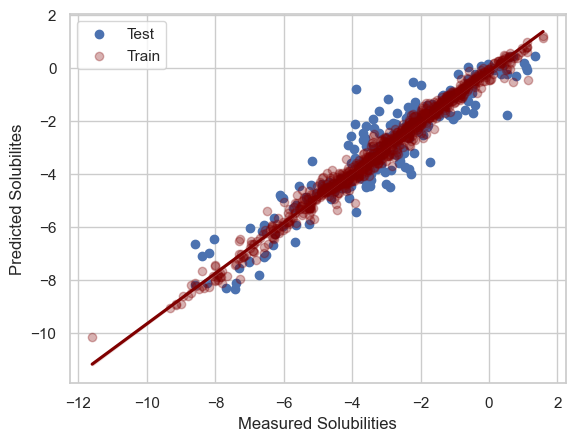

In [68]:
plt.scatter(y_test, rf.predict(X_test), label='Test')
sns.regplot(x = y_train, y = rf.predict(X_train), color = 'maroon',scatter_kws={'alpha':0.3}, label='Train' )
plt.xlabel('Measured Solubilities')
plt.ylabel('Predicted Solubilites')
plt.legend();

In [69]:
%%capture
!pip install lazypredict -q

In [70]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(predictions)

 21%|█████████▍                                  | 9/42 [00:10<00:52,  1.59s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 76%|████████████████████████████████▊          | 32/42 [00:17<00:01,  6.87it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|████████████████████████████████████████▉  | 40/42 [00:25<00:00,  2.07it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29090
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 207
[LightGBM] [Info] Start training from score -3.069889


100%|███████████████████████████████████████████| 42/42 [00:26<00:00,  1.60it/s]

                                                   Adjusted R-Squared  \
Model                                                                   
Lars                          419196897395429279394905918449647616.00   
RANSACRegressor                         40848144768358685238886400.00   
GaussianProcessRegressor                                       166.56   
KernelRidge                                                    152.34   
DummyRegressor                                                  58.05   
TransformedTargetRegressor                                      35.09   
LinearRegression                                                35.09   
LassoLars                                                       26.91   
Lasso                                                           26.91   
Ridge                                                           22.76   
ElasticNet                                                      20.79   
LinearSVR                                          

### Dimensionality Reduction Techniques
##### Principal Component Analysis

In [71]:
from sklearn.decomposition import PCA
scaled_DF.head()


nBase SpAbs_A SpMax_A SpMAD_A VR1_A nAromAtom nSpiro nBridgehead nHetero  \
0 -0.08   -1.18   -0.58   -2.07 -0.05     -1.00  -0.08       -0.12    0.22   
1 -0.08   -1.38   -0.84   -3.58 -0.05     -1.00  -0.08       -0.12   -0.13   
2 -0.08   -1.15   -0.84   -1.80 -0.05     -1.00  -0.08       -0.12    0.22   
3 -0.08   -1.24   -1.36   -1.40 -0.05     -1.00  -0.08       -0.12   -0.13   
4 -0.08   -1.02    0.21   -2.68 -0.05     -1.00  -0.08       -0.12    0.93   

     nN    nO    nS    nP    nF  nCl   nBr    nI ATS0Z AATS0dv AATS0Z AATS0se  \
0 -0.67 -0.84 -0.30 -0.19 -0.18 2.38 -0.19 -0.11  0.53   -1.04   1.54    2.67   
1 -0.67 -0.84 -0.30 -0.19 -0.18 1.68 -0.19 -0.11  0.12   -1.17   1.03    1.68   
2 -0.67 -0.84 -0.30 -0.19 -0.18 2.38 -0.19 -0.11  0.53   -1.11   1.54    2.67   
3 -0.67 -0.84 -0.30 -0.19 -0.18 1.68 -0.19 -0.11  0.12   -1.32   1.03    1.68   
4 -0.67 -0.84 -0.30 -0.19  5.65 1.68 -0.19 -0.11  0.47    4.68   1.45    6.83   

  AATS0i ATSC2c ATSC4c ATSC5c ATSC6c ATSC7c ATSC8c ATSC1dv ATSC2dv ATSC3dv  \
0  -0.08  -0.36  -0.06   0.16  -0.10   0.02  -0.01   -1.02   -0.51    0.48   
1   0.22  -0.11  -0.06   0.16  -0.10   0.02  -0.01   -0.96   -0.51    0.43   
2  -0.08  -0.51  -0.06   0.16  -0.10   0.02  -0.01   -1.04   -0.48    0.49   
3   0.22  -0.41  -0.06   0.16  -0.10   0.02  -0.01   -1.00   -0.45    0.46   
4   6.44  -1.14  -0.06   0.16  -0.10   0.02  -0.01   -0.91   -0.90    0.11   

  ATSC4dv ATSC5dv ATSC6dv ATSC7dv ATSC8dv ATSC2d ATSC3d ATSC4d ATSC5d ATSC6d  \
0    0.64    0.48    0.25    0.18    0.06  -0.39   0.94   0.64   0.35   0.23   
1    0.64    0.48    0.25    0.18    0.06  -0.05   0.81   0.64   0.35   0.23   
2    0.64    0.48    0.25    0.18    0.06  -0.39   0.94   0.64   0.35   0.23   
3    0.64    0.48    0.25    0.18    0.06  -0.05   0.81   0.64   0.35   0.23   
4    0.64    0.48    0.25    0.18    0.06  -1.34   1.30   0.64   0.35   0.23   

  ATSC7d ATSC8d ATSC1Z ATSC2Z ATSC3Z ATSC4Z ATSC5Z ATSC6Z ATSC7Z ATSC8Z  \
0   0.07  -0.11  -0.53   0.35  -1.18   0.36   0.31   0.19   0.11   0.10   
1   0.07  -0.11  -0.28   2.99  -3.18   0.36   0.31   0.19   0.11   0.10   
2   0.07  -0.11  -0.53  -1.78   0.36   0.36   0.31   0.19   0.11   0.10   
3   0.07  -0.11  -0.28  -1.28  -0.10   0.36   0.31   0.19   0.11   0.10   
4   0.07  -0.11  -0.70  -0.73   0.32   0.36   0.31   0.19   0.11   0.10   

  ATSC1v ATSC2v ATSC3v ATSC4v ATSC5v ATSC6v ATSC7v ATSC8v ATSC1se ATSC3se  \
0  -0.00   0.17  -0.14   0.42   0.32   0.15   0.13   0.01   -0.01   -0.62   
1  -0.16   1.00  -0.91   0.42   0.32   0.15   0.13   0.01    0.15   -2.01   
2  -0.00  -0.59   0.50   0.42   0.32   0.15   0.13   0.01   -0.01    0.43   
3  -0.16  -0.52   0.38   0.42   0.32   0.15   0.13   0.01    0.15    0.09   
4   0.03  -0.18   0.45   0.42   0.32   0.15   0.13   0.01   -1.18    0.94   

  ATSC4se ATSC5se ATSC6se ATSC7se ATSC8se ATSC1p ATSC1i ATSC2i ATSC3i ATSC5i  \
0    0.32    0.40    0.03    0.12    0.15   0.09   0.11  -0.23   0.78   0.12   
1    0.32    0.40    0.03    0.12    0.15   0.05   0.08  -0.22   0.76   0.12   
2    0.32    0.40    0.03    0.12    0.15   0.09   0.11  -0.26   0.80   0.12   
3    0.32    0.40    0.03    0.12    0.15   0.05   0.08  -0.28   0.81   0.12   
4    0.32    0.40    0.03    0.12    0.15   0.04  -0.72  -1.66   0.93   0.12   

  ATSC6i ATSC7i ATSC8i AATSC1d AATSC2Z AATSC0v AATSC0i MATS1c MATS1Z MATS2Z  \
0   0.03   0.03   0.04   -3.54    0.57    0.09   -1.28  -0.24  -0.51   0.53   
1   0.03   0.03   0.04   -3.76    3.19    1.31   -1.11  -2.18  -0.17   3.78   
2   0.03   0.03   0.04   -2.70   -1.55    0.09   -1.28   0.75  -0.51  -2.17   
3   0.03   0.03   0.04   -2.08   -1.05    1.31   -1.11   0.82  -0.17  -1.51   
4   0.03   0.03   0.04   -5.07   -0.50   -3.43   10.23   0.14  -1.69  -1.79   

  GATS2c GATS1Z GATS2Z GATS2v GATS1se GATS2se GATS2i BCUTc-1l BCUTdv-1l  \
0   0.08  -0.52  -0.32  -1.00   -0.03    0.10   0.19     1.86     -0.52   
1  -1.65  -0.94  -2.27  -2.54   -0.61   -1.39   0.02     1.83     -0.52   
2

In [72]:
scaled_DF.shape

(1144, 232)

In [73]:
pca = PCA(n_components=8)
pc = pca.fit_transform(scaled_DF)
pc_df = pd.DataFrame(data = pc)
pc_df.head()

0     1     2    3     4     5     6    7
0 -5.06 -1.32 -3.83 2.13 -4.97 -0.85  0.01 2.78
1 -3.82 -1.87 -4.72 2.08 -6.10 -3.82  0.58 3.14
2 -6.46 -0.52 -2.90 2.15 -2.77  1.85 -0.43 2.37
3 -6.24 -1.11 -2.60 1.32 -2.32  1.06  0.42 1.81
4 -3.88 -3.45 -6.65 4.70 -4.39 -0.19 -0.87 0.72

In [74]:
pca.explained_variance_ratio_

array([0.11665993, 0.06314619, 0.05671676, 0.04334834, 0.03934274,
       0.0326002 , 0.02963684, 0.02665802])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(pc_df, y, test_size=0.20, random_state=45)

In [76]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train, x).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     measured log(solubility:mol/L)   R-squared:                       0.745
Model:                                        OLS   Adj. R-squared:                  0.743
Method:                             Least Squares   F-statistic:                     330.9
Date:                            Mon, 18 Mar 2024   Prob (F-statistic):          9.06e-263
Time:                                    20:24:34   Log-Likelihood:                -1351.8
No. Observations:                             915   AIC:                             2722.
Df Residuals:                                 906   BIC:                             2765.
Df Model:                                       8                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')


The r2 score for train set is : 0.745024660282153
The r2 score for test set is : 0.7269370779135989


In [78]:
svm = SVR()
svm.fit(X_train, y_train)
print(f'The r2 score for train set is : {svm.score(X_train, y_train)}')
print(f'The r2 score for test set is : {svm.score(X_test, y_test)}')

The r2 score for train set is : 0.8917794792082859
The r2 score for test set is : 0.8449855304101914


In [79]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(f'The r2 score for train set is : {xgb.score(X_train, y_train)}')
print(f'The r2 score for test set is : {xgb.score(X_test, y_test)}')

The r2 score for train set is : 0.9997735264593962
The r2 score for test set is : 0.8399903263795605


In [80]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')


The r2 score for train set is : 0.9776545677574325
The r2 score for test set is : 0.8364219124960983


### t-SNE

In [81]:
from sklearn.manifold import TSNE

In [82]:
tsne = TSNE(n_components=2)
ts = tsne.fit_transform(scaled_DF)
tsne_df = pd.DataFrame(data = ts)

In [83]:
tsne_df.head()

0      1
0 -11.32 -28.97
1 -11.27 -27.05
2 -15.39 -28.13
3 -15.79 -28.02
4  -5.12 -25.67

### Visuaization in Lower Dimensions


In [84]:
y.median()

-2.8705

In [85]:
sol_cls = [int(boolean) for boolean in list(map(lambda s: s>-2.8, y))]

In [86]:
from collections import Counter
Counter(sol_cls)

Counter({0: 586, 1: 558})

Text(0, 0.5, 'tsne Component 2')

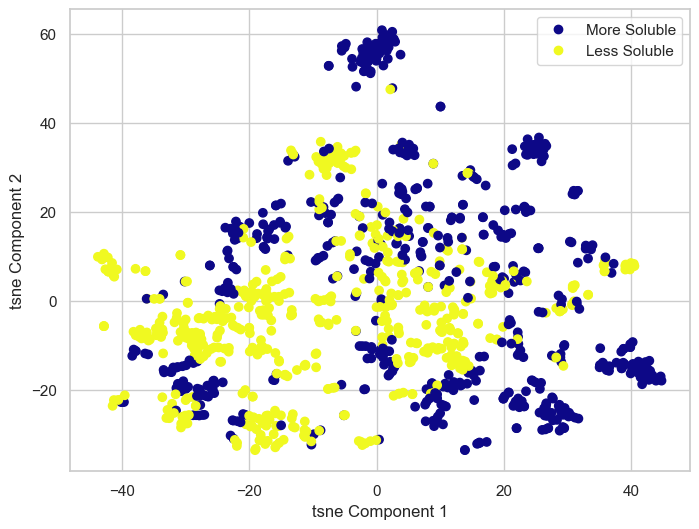

In [87]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(tsne_df.iloc[:,0],tsne_df.iloc[:,1],
                      c = sol_cls,cmap='plasma'
                      )
plt.legend(handles=scatter.legend_elements()[0], labels=['More Soluble', 'Less Soluble'], loc = 1)
plt.xlabel('tsne Component 1')
plt.ylabel('tsne Component 2')